In [1]:
import shap
import xgboost
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pylab as pl

# print the JS visualization code to the notebook
shap.initjs()

In [2]:
%run TunedXgboost_single.py

['第0次迭代的迭代结果为：10.240008749411192']
['第1次迭代的迭代结果为：8.520301625649173']
['第2次迭代的迭代结果为：8.235255368145957']
['第3次迭代的迭代结果为：8.088754237061636']
['第4次迭代的迭代结果为：8.088754237061636']
['第5次迭代的迭代结果为：7.980725948569761']
['第6次迭代的迭代结果为：7.941253553176889']
['第7次迭代的迭代结果为：7.941253553176889']
['第8次迭代的迭代结果为：7.887106028756187']
['第9次迭代的迭代结果为：7.598848120038336']
['第10次迭代的迭代结果为：7.598848120038336']
['第11次迭代的迭代结果为：7.500451021171159']
['第12次迭代的迭代结果为：7.500451021171159']
['第13次迭代的迭代结果为：7.500451021171159']
['第14次迭代的迭代结果为：7.500451021171159']
['第15次迭代的迭代结果为：7.500451021171159']
['第16次迭代的迭代结果为：7.500451021171159']
['第17次迭代的迭代结果为：7.500451021171159']
['第18次迭代的迭代结果为：7.500451021171159']
['第19次迭代的迭代结果为：7.500451021171159']
7.500451021171159 [6.32277108 0.12145267 0.33379191 0.76887424 2.9770938 ]
[0]	train-rmse:36.56091	test-rmse:37.37327
[1]	train-rmse:32.72593	test-rmse:33.61433
[2]	train-rmse:29.29048	test-rmse:30.19659
[3]	train-rmse:26.34226	test-rmse:27.31620
[4]	train-rmse:23.78633	test-rmse:24.85348
[5]	train-rmse:21.4

[175]	train-rmse:2.85103	test-rmse:6.67225
[176]	train-rmse:2.83857	test-rmse:6.68242
[177]	train-rmse:2.82993	test-rmse:6.69090
[178]	train-rmse:2.82251	test-rmse:6.68777
[179]	train-rmse:2.80833	test-rmse:6.69687
[180]	train-rmse:2.79424	test-rmse:6.68764
[181]	train-rmse:2.78517	test-rmse:6.68271
[182]	train-rmse:2.78002	test-rmse:6.68883
[183]	train-rmse:2.77529	test-rmse:6.68645
[184]	train-rmse:2.76596	test-rmse:6.69320
[185]	train-rmse:2.76147	test-rmse:6.69794
[186]	train-rmse:2.74890	test-rmse:6.69012
[187]	train-rmse:2.74296	test-rmse:6.69278
[188]	train-rmse:2.73575	test-rmse:6.68850
[189]	train-rmse:2.72695	test-rmse:6.69970
[190]	train-rmse:2.72193	test-rmse:6.70252
[191]	train-rmse:2.71850	test-rmse:6.70256
[192]	train-rmse:2.70821	test-rmse:6.68926
[193]	train-rmse:2.70139	test-rmse:6.69857
[194]	train-rmse:2.69721	test-rmse:6.70984
[195]	train-rmse:2.69062	test-rmse:6.69523
[196]	train-rmse:2.68217	test-rmse:6.70889
[197]	train-rmse:2.67694	test-rmse:6.69314
[198]	train

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
divide by zero encountered in true_divide


In [3]:
print(Gx.Alpha_pos)

[6.32277108 0.12145267 0.33379191 0.76887424 2.9770938 ]


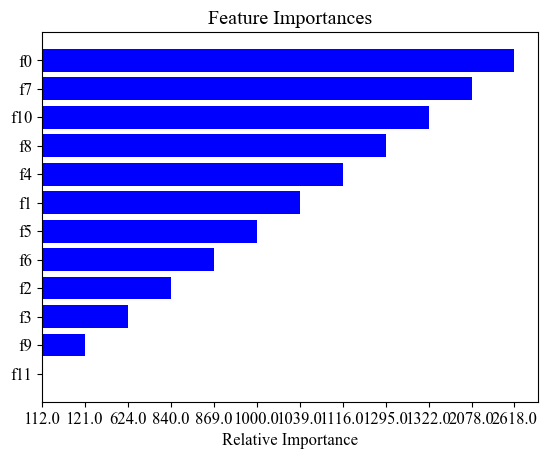

<Figure size 640x480 with 0 Axes>

In [4]:
#XGB_model.feature_importances_
import pandas as pd
import matplotlib.pyplot as plt
import operator
import numpy
dataset1 = r'2.3.xlsx'
dataset = pd.read_excel(dataset1,engine = 'openpyxl')
X = dataset.loc[:, dataset.columns != 'fc']
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 12})


features = list(X.columns.values)

importances = xgb_model.get_fscore()
importances = sorted(importances.items(), key=operator.itemgetter(1))
importances = numpy.array(importances)
y_barh = []
width_barh = []
name_barh = []
for i in range(12):
    y_barh.append(i+1)
    width_barh.append(importances[i,1])
    name_barh.append(importances[i,0])
plt.title('Feature Importances')
plt.barh(y_barh, width_barh, color='b', align='center')
plt.yticks(y_barh, name_barh)
plt.xlabel('Relative Importance')
plt.show()

plt.savefig('Alkali_Activated_Concrete_XGBplot.eps',format='eps', dpi=1000)
plt.savefig('Alkali_Activated_Concrete_XGBplot.png')

# Explain the SHAP model's predictions on the entire dataset

In [5]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [6]:
X_shap = scaler.transform(X)

In [7]:
X_shap = pd.DataFrame(X_shap, columns = X.columns)

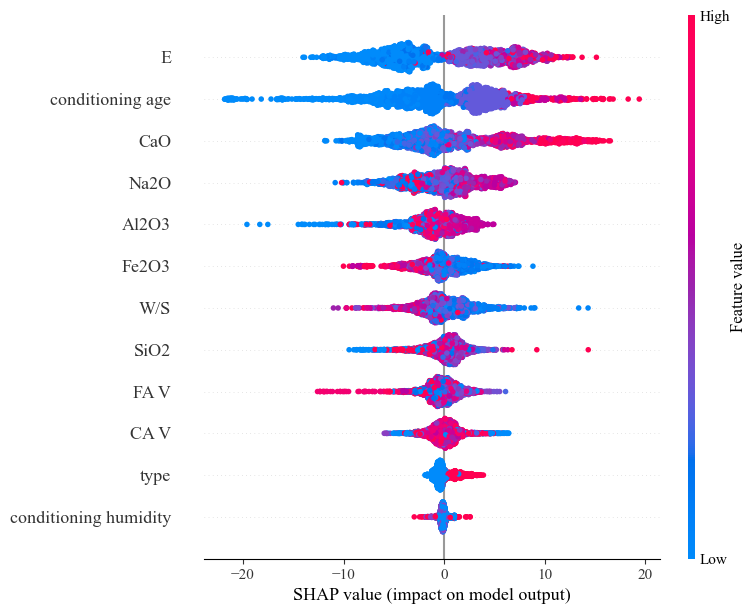

In [8]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_shap)
shap.summary_plot(shap_values, X_shap)

The bar plot shows the importance lists of the most significant variables for the failure modes in descending order

# Individual value plot

visualize the first prediction's explanation

0 corresponds to first row in excel

Features that push the prediction higher (to the right) are shown in red, and those pushing the prediction lower are in blue.

In [8]:
# Single value explainer
shap.force_plot(explainer.expected_value, shap_values[0,:], X_shap.iloc[0,:])

In [9]:
X_shap.iloc[0,:]

SiO2                    -5.006385
Al2O3                   -3.396646
Fe2O3                   -1.049577
CaO                     -1.221250
Na2O                    -2.930707
CA V                    -4.528482
FA V                    -4.388337
W/S                     -9.025732
E                       -0.352277
conditioning humidity   -1.802756
conditioning age        -0.745763
type                     0.139960
Name: 0, dtype: float64

# Entire value plot

In [10]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X)

shap.plots.force is slow for many thousands of rows, try subsampling your data.


Importance plots for various modes of failure

In the following plots, the horizontal location shows whether the effect of that value is associated with a higher or lower prediction.

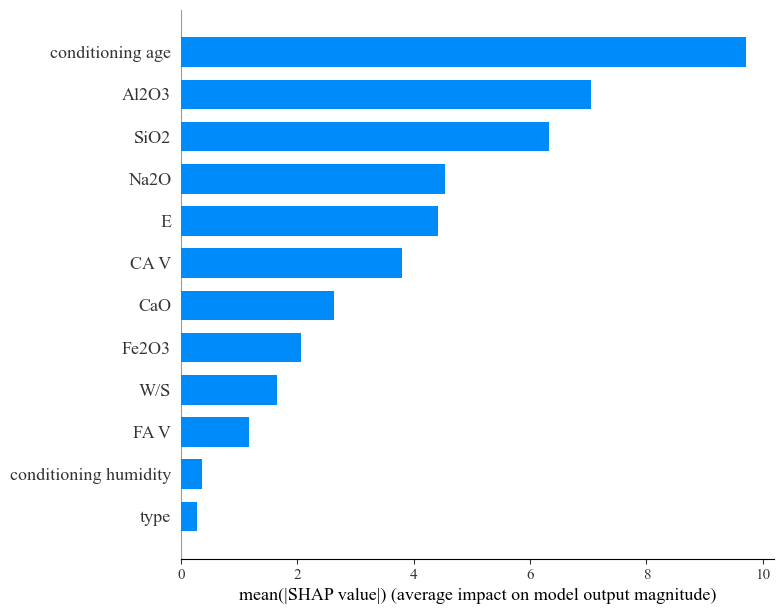

In [12]:
# Importance of Shap value for Class1 (Flexure shear)
shap.summary_plot(shap_values, X_shap,  plot_type="bar", show=False)
plt.savefig('Punchingshear_shap_barplot.eps',format='eps', dpi=1000)

# Dependance plot

SHAP dependence plots shows the marginal effect of a feature on the expected prediction. The dependence plot helps to see the underlying relation (e.g., linear, curve, complex,..) of the feature on the outcome. The most dependant variable to the selected variable is shown as a bar on the right side of the axis.

invalid value encountered in divide
invalid value encountered in divide
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


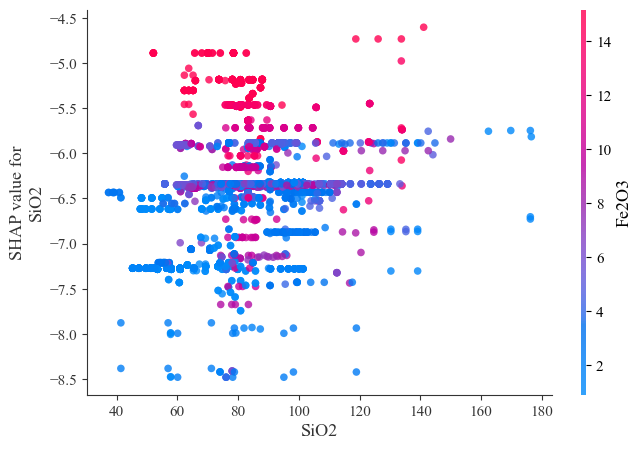

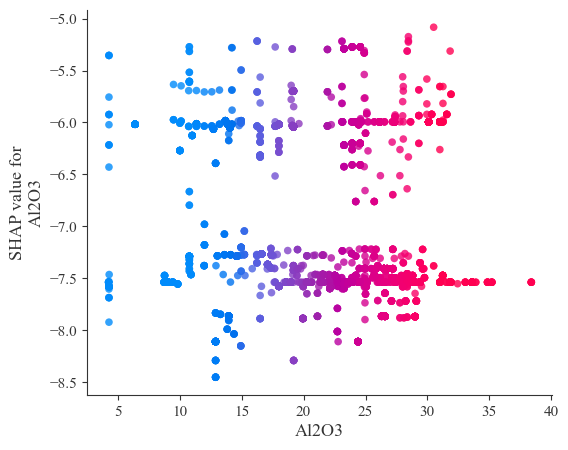

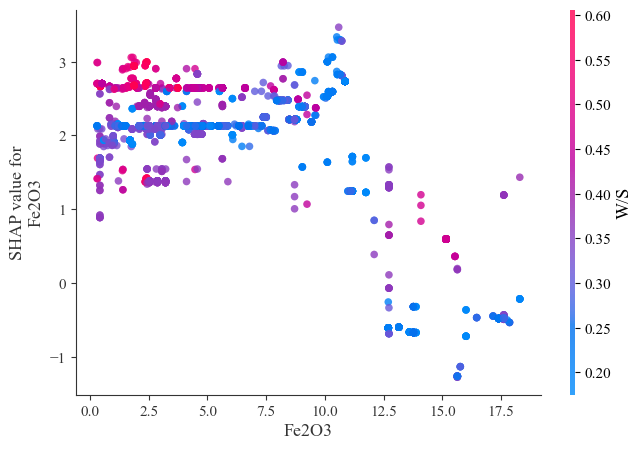

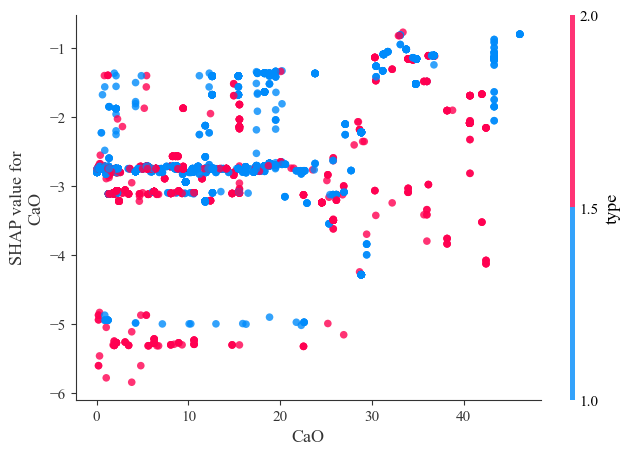

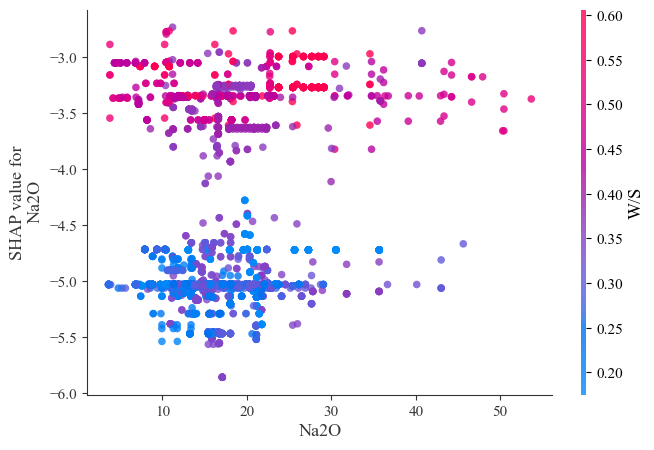

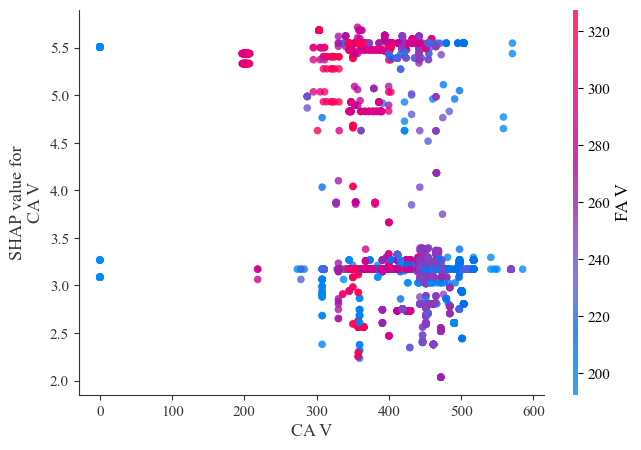

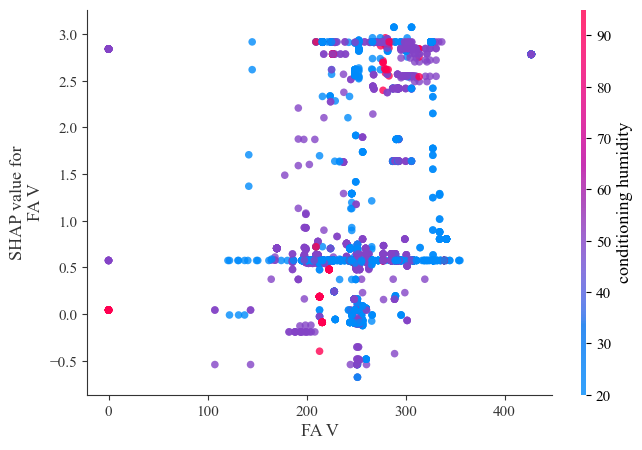

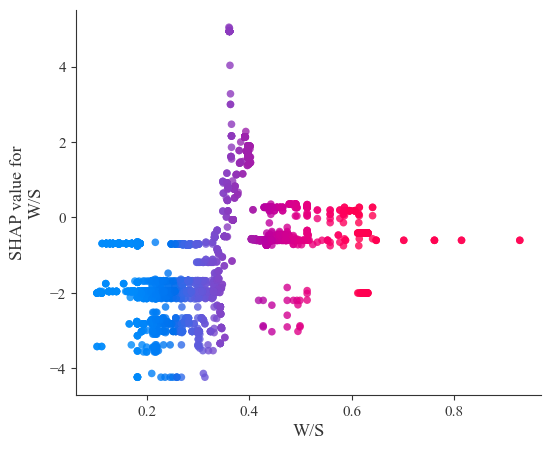

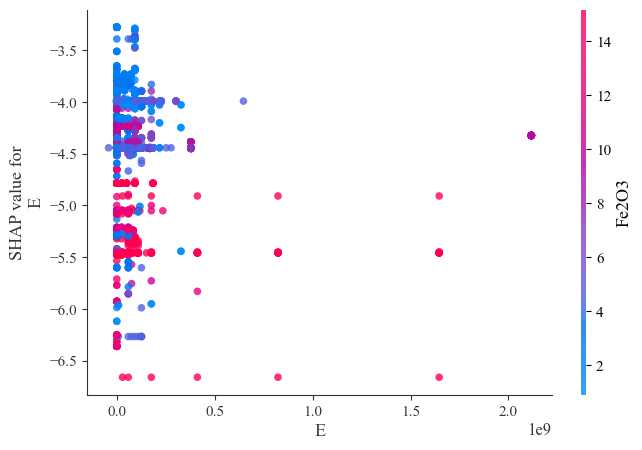

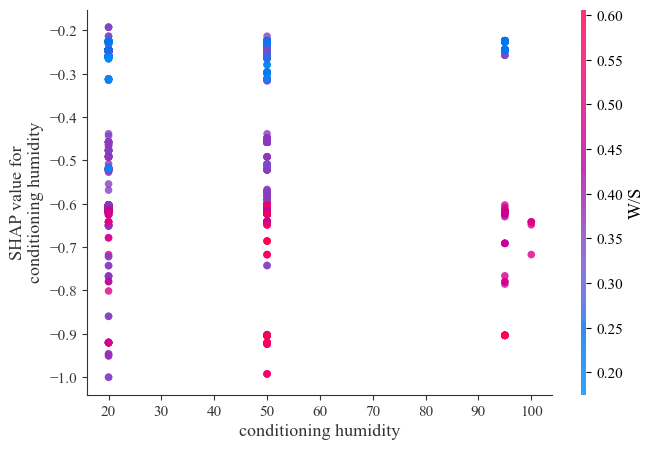

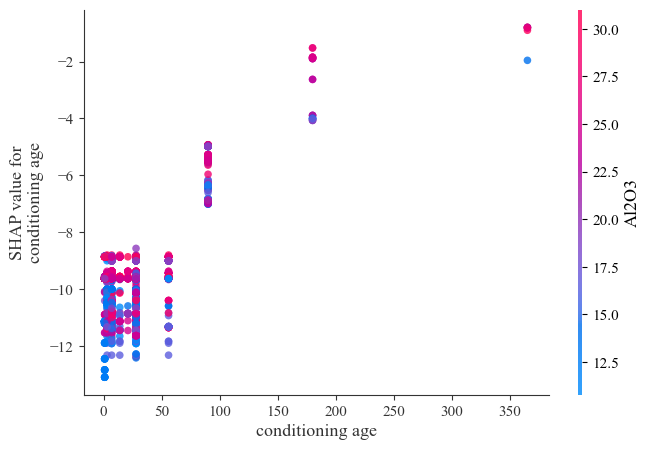

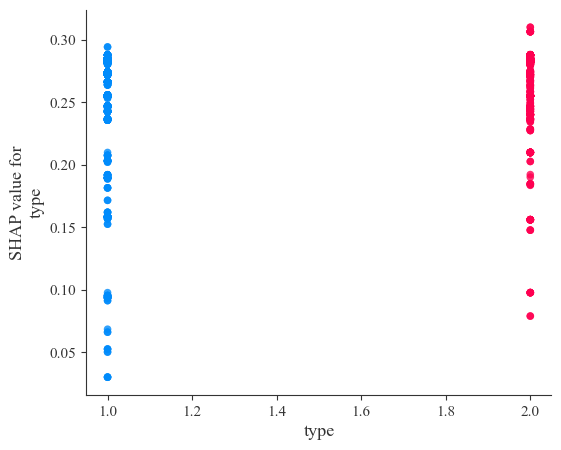

In [13]:
# Plot the dependance plot for class 0
n=1
for name in X_shap.columns:
    shap.dependence_plot(name, shap_values, X, display_features=X_shap, show=False )
    
    plt.savefig("Punching_shear_dependance_" + str(n) +".eps", format="EPS")
    n=n+1